In [1]:
from countcoins.data.dataset import CoinDataset
from countcoins.config import data_path, df_annotations_path, device, models_path, set_random_seed
from countcoins.data.IO import read_df_annotation, save_deeplearning_experiment
from countcoins.data.preprocess import add_split_column
from torchsummary import summary
from countcoins.modelling.deep_learning import CoinCounterCNN, number_of_parameters, model_memory_mb, train
from torch.utils.data import DataLoader
from countcoins.visualization import visualize_training_info
import torch.nn as nn
import torch.optim as optim

set_random_seed()

Using MPS


In [2]:
experiment_name = 'experiment_1'

params = {
    'image_size': 128,
    'model_reduce_factor': 2,
    'batch_size': 32,
    'num_workers': 0,
    'epochs': 30,
}

In [3]:
df_annotations = read_df_annotation(df_annotations_path)
df_annotations = add_split_column(df_annotations, test_size=.3)
train_dataset = CoinDataset(df_annotations=df_annotations, data_path=data_path, set_='train', mode='training', image_size=params['image_size'])
test_dataset = CoinDataset(df_annotations=df_annotations, data_path=data_path, set_='test', mode='inference', image_size=params['image_size'])
train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True, num_workers=params['num_workers'])
test_loader = DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False, num_workers=params['num_workers'])


model = CoinCounterCNN(reduce_factor=params['model_reduce_factor'], image_size=params['image_size']).to(device)
criterion = nn.MSELoss()  # Mean Squared Error for regression
additional_criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# summary(model, (1, image_size, image_size), )
print(f'Number of params: {number_of_parameters(model)}. CLs: {number_of_parameters(model.conv_layers)}, FCs: {number_of_parameters(model.fc_layers)}')
print(f'Memory: {model_memory_mb(model):.2f} MB')


Number of params: 530321. CLs: 5904, FCs: 524417
Memory: 2.02 MB


In [4]:
model, df_training_info = train(model=model,
                                epochs=params['epochs'],
                                optimizer=optimizer,
                                criterion=criterion,
                                additional_criterion=additional_criterion,
                                train_loader=train_loader,
                                test_loader=test_loader,
                                device=device)

Epoch [1/30], Train loss: 51.64, Test loss: 32.07. Time: 11.9
Epoch [2/30], Train loss: 38.13, Test loss: 17.52. Time: 8.9
Epoch [3/30], Train loss: 29.20, Test loss: 19.54. Time: 9.2
Epoch [4/30], Train loss: 25.46, Test loss: 23.66. Time: 9.4
Epoch [5/30], Train loss: 23.58, Test loss: 16.41. Time: 11.2
Epoch [6/30], Train loss: 15.63, Test loss: 13.59. Time: 10.5
Epoch [7/30], Train loss: 11.92, Test loss: 15.14. Time: 11.0
Epoch [8/30], Train loss: 8.98, Test loss: 11.38. Time: 9.7
Epoch [9/30], Train loss: 5.96, Test loss: 10.69. Time: 8.9
Epoch [10/30], Train loss: 4.69, Test loss: 9.87. Time: 8.5
Epoch [11/30], Train loss: 4.61, Test loss: 11.79. Time: 8.1
Epoch [12/30], Train loss: 3.34, Test loss: 10.88. Time: 8.7
Epoch [13/30], Train loss: 3.29, Test loss: 8.82. Time: 8.7
Epoch [14/30], Train loss: 2.82, Test loss: 8.45. Time: 9.0
Epoch [15/30], Train loss: 1.92, Test loss: 9.71. Time: 8.4
Epoch [16/30], Train loss: 1.95, Test loss: 8.39. Time: 9.4
Epoch [17/30], Train loss: 

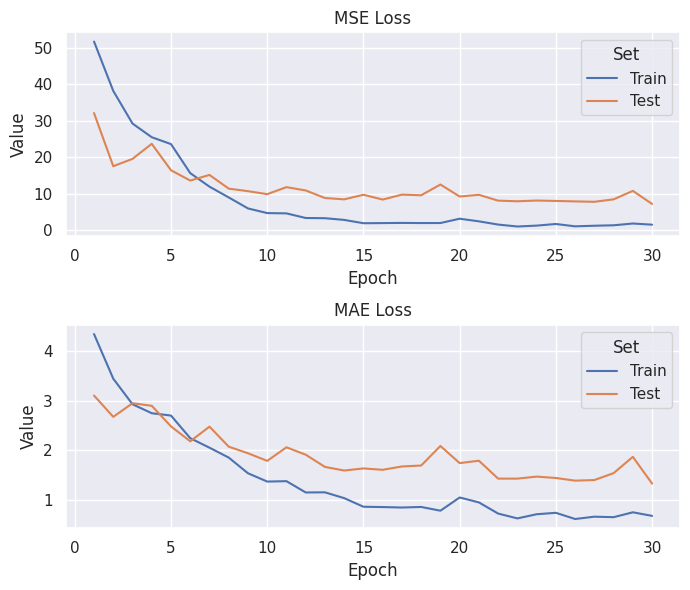

In [5]:
fig_training = visualize_training_info(df_training_info=df_training_info, plt_close=False)

In [6]:
save_deeplearning_experiment(model=model,
                             df_training_info=df_training_info,
                             fig_training=fig_training,
                             models_path=models_path,
                             params=params,
                             experiment_name=experiment_name)

Experiment saved in: /Users/luigidamico/Documents/GitHub/count-coins/models/experiment_1


In [ ]:
my_model = CoinCounterCNN(reduce_factor=params['redu'])